In [1]:
from math import sqrt, pi
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy import exp, mod, pi
from scipy import integrate


In [2]:
numel = lambda x:np.size(x)
reshape = lambda x, M, N :x.reshape(M,N,order='F').copy()


In [3]:
def plot_complex_sig(x, t):
    plt.subplot(1, 2, 1)
    plt.plot(t,np.real(x), 'm')

    plt.subplot(1, 2, 2)
    plt.plot(t,np.imag(x), 'g')

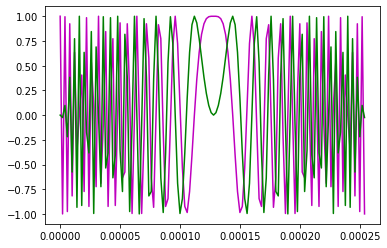

In [4]:
bw = 500e3
sf = 7
M = 2**sf
mu = (bw**2)/M
T = M/bw
fs = bw
chirp_sig = lambda t:exp(1j*2*pi*((mu*t/2) - (bw/2))*t)

t = np.arange(0, T, 1/fs, dtype=np.double)

# shi = 2*pi*((mu*t/2) - (bw/2))*t
# sig = exp(1j*shi)

sig = chirp_sig(t)

# plt.subplot(1, 2, 1)
plt.plot(t,np.real(sig), 'm')

# plt.subplot(1, 2, 2)
plt.plot(t,np.imag(sig), 'g')

In [5]:
len(sig)

128

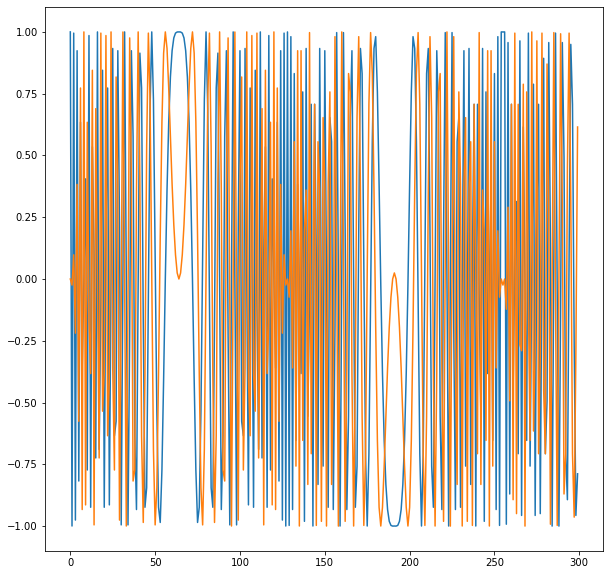

In [6]:
x = np.array(range(int(2**sf)))
N= 300

Ts      = (2**sf)/bw 
Ns      = fs*M/bw
Inv = 1
gamma   = x/Ts 
beta    = bw/Ts 

time = (1/fs)*np.array(range(int(Ns)))

gamma1 = np.matrix(gamma.reshape(1,-1))
bt = beta*time
bt1 = np.matrix(bt.reshape(-1,1))
freq  = mod(gamma1 + Inv*bt1,bw) - bw/2

# yi = integrate.cumtrapz(freq[0,:], x= time.reshape(1,-1), initial=0)
Nt = 2**sf#len(yi[0][0:])
th_tmp = np.zeros((Nt,Nt))
for i in range(Nt):
    th_tmp[:,i] = integrate.cumtrapz(freq[i,:], x = time.reshape(1,-1), initial=0)

y = exp(1j*2*pi*th_tmp)
mod_sig = reshape(y,numel(th_tmp),1)
# plot_complex_sig(mod_sig, range(len(mod_sig)))
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(np.real(mod_sig)[:,0][:N])
plt.plot(np.imag(mod_sig)[:,0][:N])

In [7]:
mod_sig.shape

(16384, 1)

In [21]:
import struct
from ast import literal_eval

In [30]:
def float2bin(in_fileName, out_file):

    with open(in_fileName) as f:
        lines = [line.rstrip() for line in f]
    lines_f = [float(line) for line in lines]
    lines_hex = [hex(struct.unpack('<I', struct.pack('<f', f))[0]) for f in lines_f]
    lines_bin = [bin(literal_eval(hx))[2:] for hx in lines_hex]
    with open(out_file, 'w') as fp:
        for item in lines_bin:
            fp.write("%s\n" % item)


In [31]:
in_fileName = 'cos_256_real.txt'
out_file = r'cos_256_bin.txt'
float2bin(in_fileName, out_file)

In [32]:
in_fileName = 'sin_256_imag.txt'
out_file = r'sin_256_bin.txt'
float2bin(in_fileName, out_file)

Done
